In [3]:
import pandas as pd

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from collections import Counter
import matplotlib.pyplot as plt
import os

In [5]:
import cv2
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

In [6]:
def read_and_process_image(image_path, target_size = (128, 128)):
    img = cv2.imread(image_path)  # Đọc hình ảnh từ đường dẫn
    img = cv2.resize(img, target_size)  # Resize hình ảnh đến kích thước mong muốn
    img = img.astype('float32') / 255.0  # Chuẩn hóa giá trị pixel về khoảng [0, 1]
    return img

In [7]:
def process_data(csv_file):
    encoder = OneHotEncoder()
    # Đọc dữ liệu từ file CSV
    df = pd.read_csv(csv_file)
    
    # Chuẩn bị danh sách các hình ảnh và nhãn
    X = []
    y = df['label']
    
    # Xử lý từng hình ảnh
    for index, row in df.iterrows():
        image_path = row['file_path']
        img = read_and_process_image(image_path)
        X.append(img)
    
    X_tensor = np.array(X)
    X_reshaped = X_tensor.reshape(-1, 128, 128, 3)
    y = encoder.fit_transform(np.array(y).reshape(-1,1)).toarray()
    return X_reshaped, y

In [8]:
import pandas as pd

X_train, y_train = process_data(r"D:\data_analysis\speech_emotion_recognition\data\EnglishDataset\train_test_splited_data\images\256\train.csv")
X_val, y_val = process_data(r"D:\data_analysis\speech_emotion_recognition\data\EnglishDataset\train_test_splited_data\images\256\validation.csv")
X_test, y_test = process_data(r"D:\data_analysis\speech_emotion_recognition\data\EnglishDataset\train_test_splited_data\images\256\test.csv")

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((27858, 128, 128, 3),
 (27858, 7),
 (3468, 128, 128, 3),
 (3468, 7),
 (3507, 128, 128, 3),
 (3507, 7))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    # Block 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    
    # Block 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Block 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    # Fully connected layers
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    # Output layer
    Dense(7, activation='softmax')
])

from keras.optimizers import Adam
learning_rate = 0.00008
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# In ra thông tin tóm tắt về mô hình
model.summary()

d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,549,831 (24.99 MB)

 Trainable params: 6,549,831 (24.99 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

cnn_model_checkpoint = ModelCheckpoint('best_cnn_model_weights_using_mel_spectrogram.keras', monitor='val_accuracy', save_best_only=True)

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=6, restore_best_weights=True)

lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [12]:
history=model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=64,callbacks=[early_stop,lr_reduction,cnn_model_checkpoint])

Epoch 1/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 73s 164ms/step - accuracy: 0.2200 - loss: 1.8499 - val_accuracy: 0.4611 - val_loss: 1.4310 - learning_rate: 8.0000e-05
Epoch 2/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 71s 163ms/step - accuracy: 0.4480 - loss: 1.4266 - val_accuracy: 0.5623 - val_loss: 1.1949 - learning_rate: 8.0000e-05
Epoch 3/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 70s 161ms/step - accuracy: 0.5324 - loss: 1.2180 - val_accuracy: 0.5672 - val_loss: 1.1446 - learning_rate: 8.0000e-05
Epoch 4/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 71s 162ms/step - accuracy: 0.5660 - loss: 1.1279 - val_accuracy: 0.5880 - val_loss: 1.0780 - learning_rate: 8.0000e-05
Epoch 5/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 70s 160ms/step - accuracy: 0.5918 - loss: 1.0583 - val_accuracy: 0.5934 - val_loss: 1.0414 - learning_rate: 8.0000e-05
Epoch 6/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 69s 158ms/step - accuracy: 0.6245 - loss: 0.9879 - val_accuracy: 0.6014 - val_loss: 1.0288 - learning_rate: 8.0000e-05
Epoch 7/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 83s 16

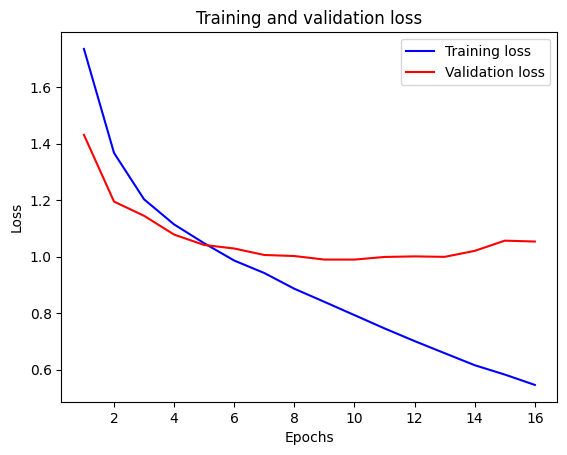

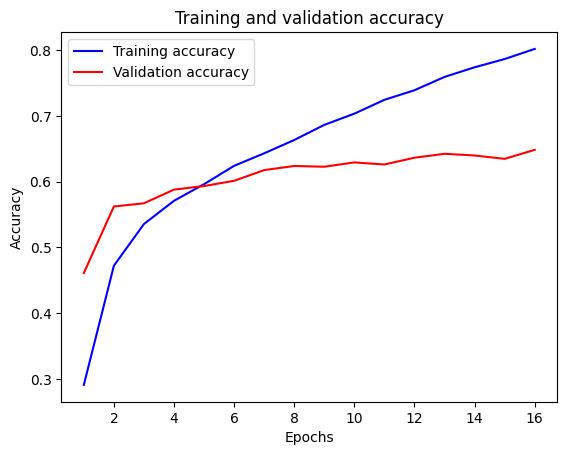

In [13]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Vẽ biểu đồ Loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ biểu đồ Accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
from keras.models import load_model

# Load mô hình đã được lưu
model = load_model('best_cnn_model_weights.keras')

# Đánh giá mô hình trên dữ liệu kiểm tra
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.6572 - loss: 0.9807
Test Loss: 1.026074767112732
Test Accuracy: 0.6456170678138733
